### MATH 6388: Statistical and Machine Learning, Fall 2022 
### Homework 6

### Problem 1

Consider a neural network model for $K$-class classification with a single hidden layer. The input $\mathbf{x}$ has $D_x$ features so we have $\mathbf{x}\in\mathbb{R}^{D_x}$. We also assume that the hidden layer contains $D_h$ units with the LeakyReLU activation function, defined as for a given $\alpha$

$$\text{LeakyReLU}(z)=\max(0, z) + \alpha * \min(0, z)$$

The output layer uses the softmax activation function to produce a valid probability mass function over the $K$ classes. In the following, we express the network and loss function using mathematical equations

$$\begin{align}\mathbf{z}^{[1]}=\mathbf{W}^{[1]}\mathbf{x}+\mathbf{b}^{[1]}\\
\mathbf{a}^{[1]}=\text{LeakyReLU}(\mathbf{z}^{[1]}, \alpha=0.01)\\
\mathbf{z}^{[2]}=\mathbf{W}^{[2]}\mathbf{a}^{[1]}+\mathbf{b}^{[2]}\\
\hat{\mathbf{y}}=\text{softmax}(\mathbf{z}^{[2]})\\
\mathcal{L}(\mathbf{y},\hat{\mathbf{y}})=-\sum_{i=1}^Ky_i\log(\hat{y}_i)\end{align}$$

(a) Draw the neural network model and show weights and biases $\mathbf{W}^{[1]}, \mathbf{W}^{[2]}, \mathbf{b}^{[1]}, \mathbf{b}^{[2]}$ (i.e., how information flows from the input to the output layer).

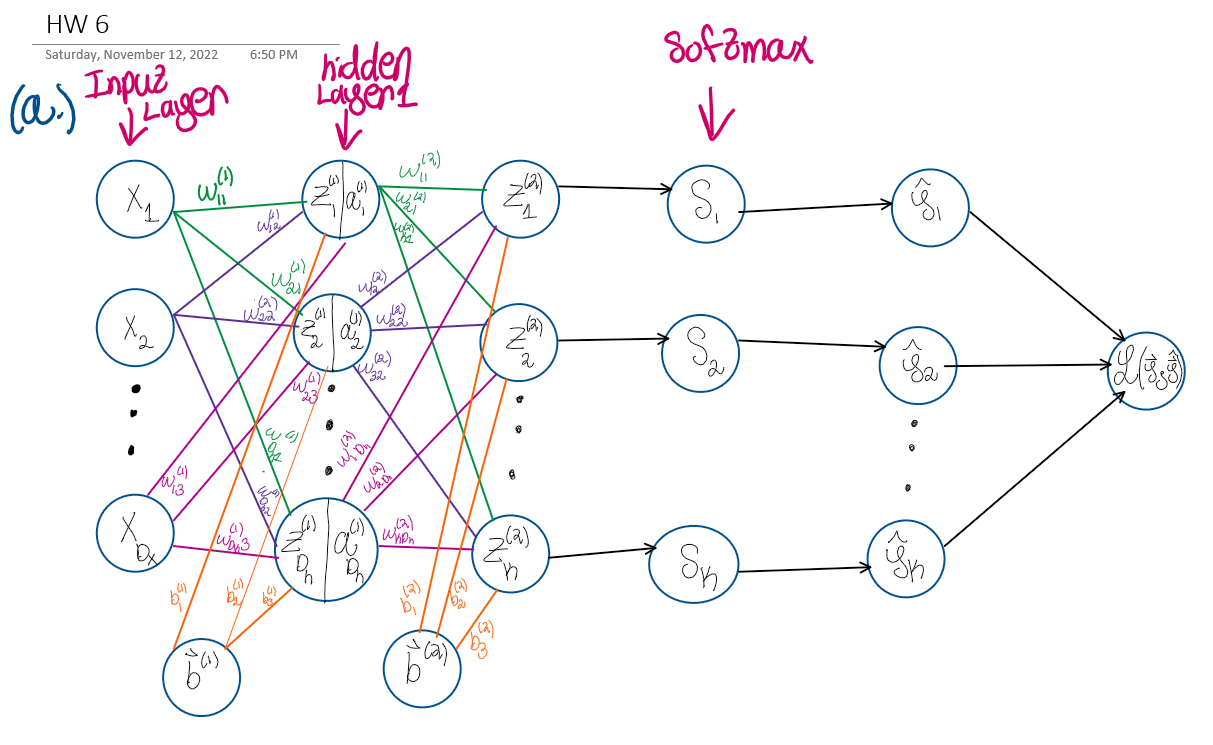

(b) What is the shape of $\mathbf{W}^{[1]}, \mathbf{W}^{[2]}, \mathbf{b}^{[1]}, \mathbf{b}^{[2]}$, i.e., number of rows and columns?

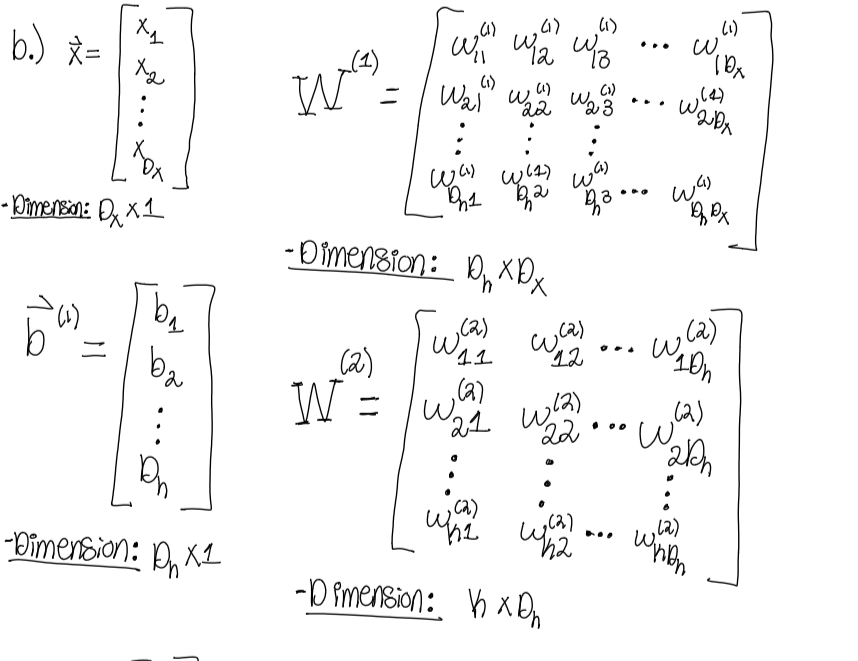

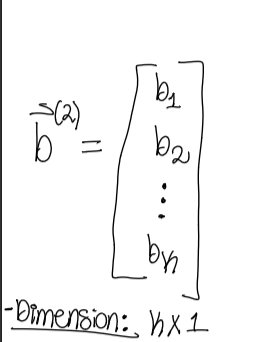

(c) What is $\frac{\partial \hat{y}_k}{\partial z^{[2]}_k}$? $\hat{y}_k$ and $z^{[2]}_k$ represent the $k$-th element of $\hat{\mathbf{y}}$ and $\mathbf{z}^{[2]}$, respectively. Simplify your solution as a function of $\hat{\mathbf{y}}$.

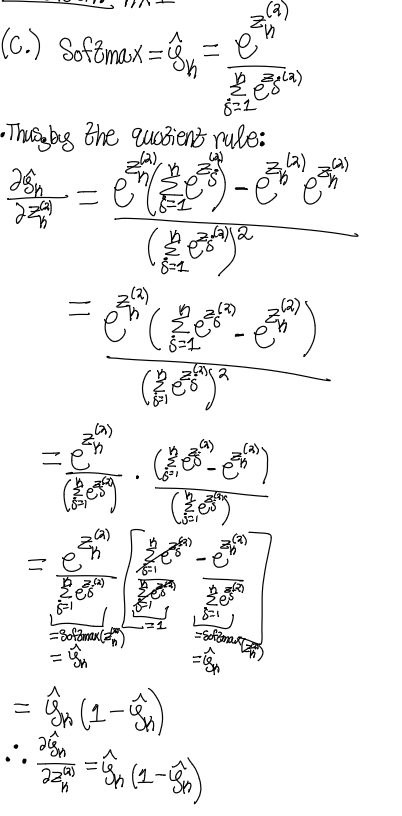

(d) What is $\frac{\partial \hat{y}_k}{\partial z^{[2]}_i}$ for $i\neq k$? Simplify your solution as a function of $\hat{\mathbf{y}}$.

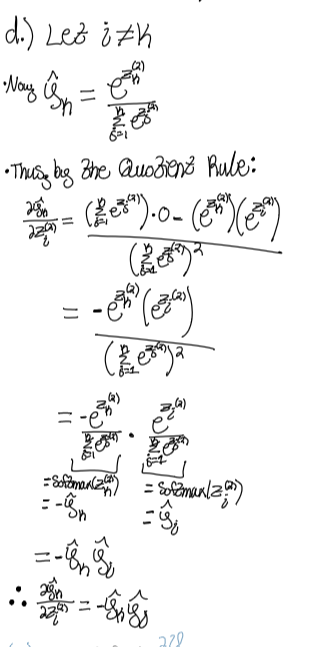

(e) What is $\frac{\partial \mathcal{L}}{\partial z^{[2]}_i}$? Assume the one-hot encoding of $\mathbf{y}$ has $1$ at its $k$-th location. 

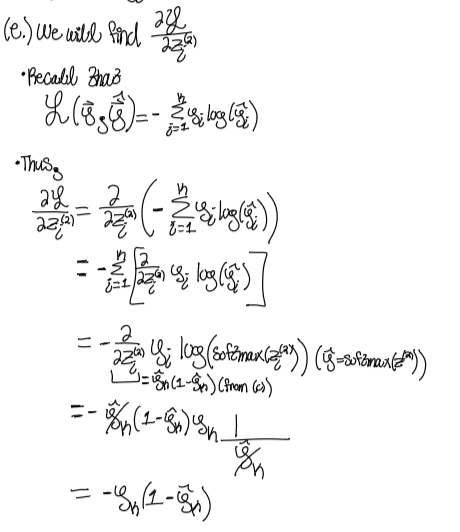

### Problem 2

In this problem, we work with a bank's customers data set and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed account) or continues to be a customer.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.compose import ColumnTransformer
import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

#Needed to Create Loss & Accuray Plots
import pandas as pd
import matplotlib.pyplot as plt

# Importing the data set
dataset = pd.read_csv('Churn_Modelling.csv')
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [2]:
X = dataset.iloc[:, 3:13].values # Remove RowNumber, CustomerId, Surname, Exited
y = dataset.iloc[:, 13].values   # The last column "Exited" is our dependent variable
print(X, y)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]] [1 0 1 ... 1 1 0]


In [3]:
# second and third features are categorical 

labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])

In [4]:
# Split the data into training and test sets 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [5]:
# Apply feature scaling to all features before training a neural network
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
print(X_train.shape, X_test.shape, X_train.dtype)


(8000, 10) (2000, 10) float64


(a) Using Keras, define a neural network with two hidden layers containing 6 units with the ReLU activation function.

In [7]:
# Creating the model using the Sequential API 
 
model = keras.models.Sequential() 
 
model.add(keras.layers.Flatten(input_shape=[10, ], name = 'Input.Layer')) 
model.add(keras.layers.Dense(6, activation="relu", name = 'Hidden.Layer.1'))  
model.add(keras.layers.Dense(6, activation="relu", name = 'Hidden.Layer.2')) 
model.add(keras.layers.Dense(1, activation="sigmoid", name = 'Output.Layer'))  

(b) Find the number of trainable parameters and justify.  

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input.Layer (Flatten)       (None, 10)                0         
                                                                 
 Hidden.Layer.1 (Dense)      (None, 6)                 66        
                                                                 
 Hidden.Layer.2 (Dense)      (None, 6)                 42        
                                                                 
 Output.Layer (Dense)        (None, 1)                 7         
                                                                 
Total params: 115
Trainable params: 115
Non-trainable params: 0
_________________________________________________________________


We can see from the model summary of the Nerual Network created in part a that there are 115 avaliable trainable paramaters.

(c) Compile the model with a suitable loss function and optimizer. 

In [10]:
# Compiling the model
model.compile(loss="binary_crossentropy",
optimizer="adam",
metrics=["accuracy"]) 


(d) Train the neural network model. Set the number of epochs to 20. 

In [31]:
# Training the model
history = model.fit(X_train, y_train, batch_size=20, epochs=20,
                   validation_data = (X_test, y_test))


Epoch 1/20
400/400 [==============================] - 1s 2ms/step - loss: 0.3427 - accuracy: 0.8599 - val_loss: 0.3441 - val_accuracy: 0.8565
Epoch 2/20
400/400 [==============================] - 1s 2ms/step - loss: 0.3418 - accuracy: 0.8608 - val_loss: 0.3405 - val_accuracy: 0.8610
Epoch 3/20
400/400 [==============================] - 1s 2ms/step - loss: 0.3412 - accuracy: 0.8605 - val_loss: 0.3393 - val_accuracy: 0.8590
Epoch 4/20
400/400 [==============================] - 1s 2ms/step - loss: 0.3410 - accuracy: 0.8589 - val_loss: 0.3401 - val_accuracy: 0.8620
Epoch 5/20
400/400 [==============================] - 1s 2ms/step - loss: 0.3406 - accuracy: 0.8612 - val_loss: 0.3381 - val_accuracy: 0.8620
Epoch 6/20
400/400 [==============================] - 1s 2ms/step - loss: 0.3396 - accuracy: 0.8605 - val_loss: 0.3435 - val_accuracy: 0.8605
Epoch 7/20
400/400 [==============================] - 1s 2ms/step - loss: 0.3398 - accuracy: 0.8597 - val_loss: 0.3356 - val_accuracy: 0.8640
Epoch 

(e) Plot values of loss and accuracy as a function of the epoch number. 

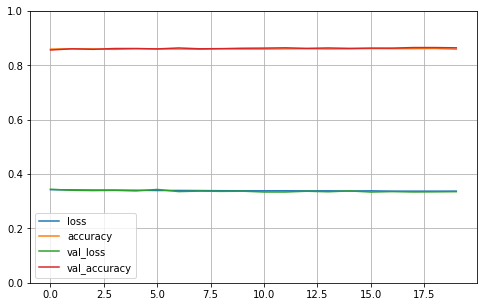

In [32]:
# We can create a DataFrame to plot these values

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

(f) Make predictions using the test data set. The predictions should be either 0 or 1, and use 0.5 as the probability threshold.  

In [33]:
# making predictions
y_proba = model.predict(X_test)
y_proba.round(2)


array([[0.22],
       [0.4 ],
       [0.16],
       ...,
       [0.1 ],
       [0.12],
       [0.16]], dtype=float32)

In [34]:
y_pred = (y_proba.round(2) > 0.5).astype(int)

In [35]:
#y_pred = np.argmax(y_proba, axis =1)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

(g) Plot the confusion matrix. 

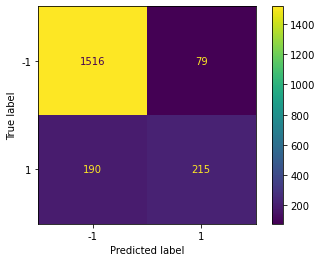

In [36]:
# Needed to Create Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=np.array([-1,1]))

(h) What is the recall value? How can we increase it? Should we decrease or increase the probability threshold?

Recall that Recall is defined as follows: 

Recall(Sensitivity) $ = \frac{TP}{TP+FN} = TPR$

In [37]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
recall

0.5308641975308642

Therefore, the Recall Value here is 0.53. 

To increase the Recall Value, we must decrease the probability threshold in order to decrease the number of False Negative instances which will in turn increase the Recall Value.